In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [63]:
df = pd.read_csv('Eval/evals.csv')
df.head()

,size,document,splitter,score,chunk,question,relevance_rating,groundness_rating,standalone_rating,limit,collection,context,ctx_length,answer,model,scores
0,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,semantic,['26-12-2014). 40B. Limitation of expenses of ...,23940,Individuals or entities who violate the provis...,meta-llama-3.1-8b-instruct,"{\n ""precision"": 6,\n ""faithfulness"": 8\n}"
1,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,char,['domiciled outside India or any insurer as de...,5844,Individuals or entities who violate the provis...,meta-llama-3.1-8b-instruct,"{\n ""precision"": 9,\n ""faithfulness"": 10..."
2,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,token,"['thereof shall, in all legal proceedings (whe...",27040,Individuals or entities who violate the provis...,meta-llama-3.1-8b-instruct,"{\n ""precision"": 6,\n ""faithfulness"": 9\..."
3,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,recursive,['(i) “policy” means a policy issued or renewe...,26431,"According to the context, individuals or entit...",meta-llama-3.1-8b-instruct,"{\n ""precision"": 8,\n ""faithfulness"": 9\..."
4,1000,insurance_act,char,0.8,"the Special Economic Zones Act, 2005 (28 of 20...",What legal consequences (penalties) exist for ...,5,5,5,3,semantic,['26-12-2014). 40B. Limitation of expenses of ...,23940,Individuals or entities violating provisions o...,meta-llama-3.1-8b-instruct,"{\n ""precision"": 6,\n ""faithfulness"": 8\n}"


In [64]:
def clean_scores(score):
    result = {}
    left = score.index('{')
    right = score.index('}') + 1
    score = score[left:right].replace('\n', '').replace(' ', '')
    first, second = score.split(',')
    second = second.replace('}', '')
    result['precision'] = int(first.split(':')[-1])
    result['faithfulness'] = int(second.split(':')[-1])
    return result


In [65]:
df['scores'] = df['scores'].apply(clean_scores)
df[['precision', 'faithfulness']] = df['scores'].apply(pd.Series)

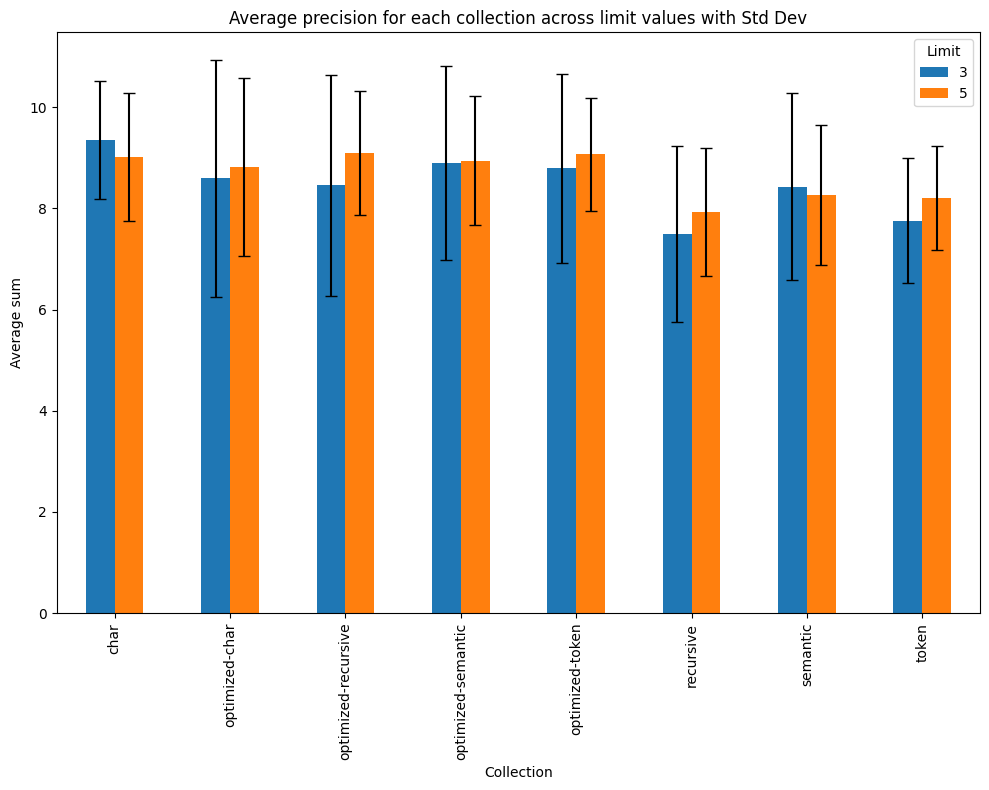

In [69]:
stats = df.groupby(['collection', 'limit'])['precision'].agg(['mean', 'std']).unstack()

# Plotting with error bars
fig, ax = plt.subplots(figsize=(10, 8))
stats['mean'].plot(kind='bar', yerr=stats['std'], capsize=4, ax=ax)
ax.set_title('Average precision for each collection across limit values with Std Dev')
ax.set_xlabel('Collection')
ax.set_ylabel('Average sum')
ax.legend(title='Limit')
plt.tight_layout()
plt.show()

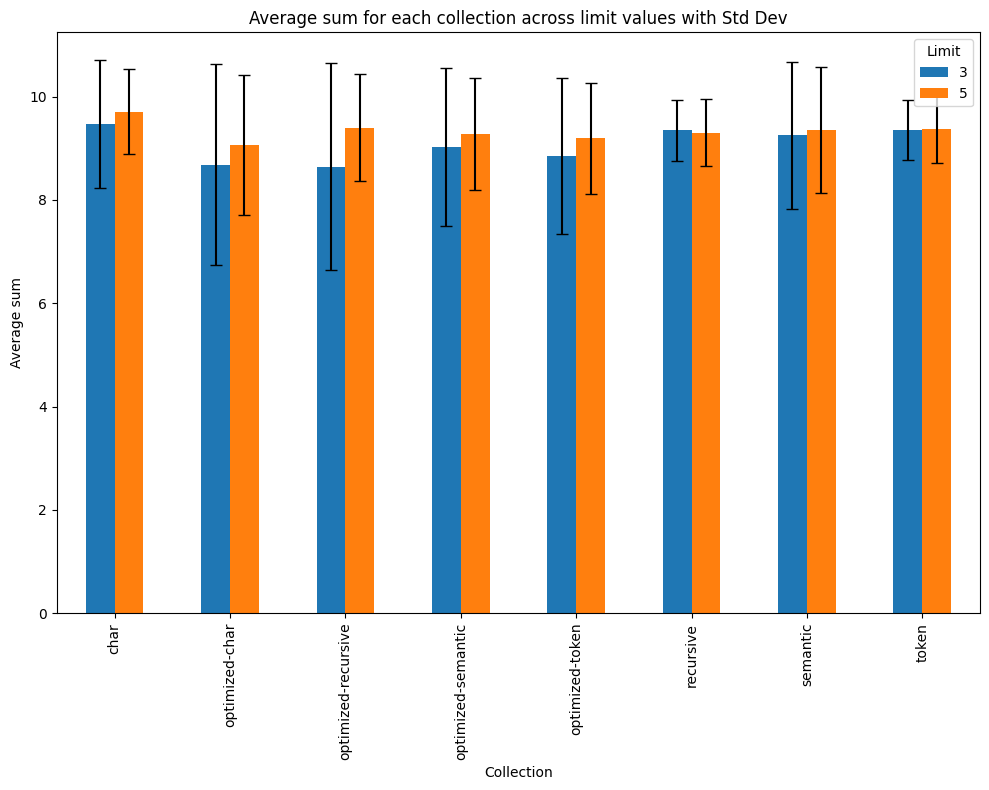

In [68]:
stats = df.groupby(['collection', 'limit'])['faithfulness'].agg(['mean', 'std']).unstack()

# Plotting with error bars
fig, ax = plt.subplots(figsize=(10, 8))
stats['mean'].plot(kind='bar', yerr=stats['std'], capsize=4, ax=ax)
ax.set_title('Average sum for each collection across limit values with Std Dev')
ax.set_xlabel('Collection')
ax.set_ylabel('Average sum')
ax.legend(title='Limit')
plt.tight_layout()
plt.show()